In [1]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import os
import numpy as np 

def read_tensorboard_data(tensorboard_path, val_name):
    """读取tensorboard数据，
    tensorboard_path是tensorboard数据地址val_name是需要读取的变量名称"""
    ea = event_accumulator.EventAccumulator(tensorboard_path)
    ea.Reload()
    print(ea.scalars.Keys())
    val = ea.scalars.Items(val_name)
    return val
 
def draw_plt(val, val_name):
    """将数据绘制成曲线图，val是数据，val_name是变量名称"""
    plt.figure()
    plt.plot([i.step for i in val], [j.value for j in val], label=val_name)
    """横坐标是step，迭代次数
    纵坐标是变量值"""
    plt.xlabel('step')
    plt.ylabel(val_name)
    plt.show()

def get_event_data(tensorboard_path,key):
    # print(tensorboard_path)
    ea = event_accumulator.EventAccumulator(tensorboard_path)
    ea.Reload()
    # print(ea.scalars.Keys())
    value = [i.value for i in  ea.scalars.Items(key)]
    return value

def get_file_list(file_path):
    dir_list = os.listdir(file_path)
    if not dir_list:
        return
    else:
        # 注意，这里使用lambda表达式，将文件按照最后修改时间顺序升序排列
        # os.path.getmtime() 函数是获取文件最后修改时间
        # os.path.getctime() 函数是获取文件最后创建时间
        dir_list = sorted(dir_list,key=lambda x: os.path.getmtime(os.path.join(file_path, x)))
        # print(dir_list)
        return dir_list

def get_event_data_mean(tensorboard_path_list,key):
    len_ea = len(tensorboard_path_list)
    eas = [event_accumulator.EventAccumulator(i).Reload() for i in tensorboard_path_list]
    values = []
    for ea in eas:
        value = [i.value for i in ea.scalars.Items(key)]
        values.append(value)
    
    values = np.array(values)
    values = list(np.mean(values,axis=0))
    return values

ea = event_accumulator.EventAccumulator('/home/featurize/result/tensorboard_logs/cifar10/iid/attack/label/attack_num:18attack_frequency:1client_num:20train_num:20train_round:200(model):lanet(experiment):R_mipc_labelflip_iid_18')
ea.Reload()
ea.scalars.Keys()
len(ea.scalars.Items('Server_Acc'))
 

400

In [2]:
import numpy as np
a = [[1,2,3],[1,2,3]]
b = np.array(a)
list(np.mean(b,axis=0))

[1.0, 2.0, 3.0]

In [3]:

import os

def get_group_data(dataset='mnist',distribution='iid',attack_type='label',define_type='fedavg',key='Server_Acc',attack_round=150,mean_value=False):
    '''
        attack_type = ['gaussian','label','pixel','replace']
        define_type = ['fedavg','fedavg-krum','fedsign','fedsign-krum','fedsign-fadc-nmi','fedsign-fadc-ed']
    '''

    dataset_dict = {'mnist':'MNIST','fmnist':'FMNIST','cifar10':''}
    define_dict = {'fedavg':'FedAVG','fedavg-krum':'Krumavg','fedsign':'sign','fedsign-krum':'Krum','fedsign-fadc-nmi':'mipc'}
    attack_dict = {'gaussian':'gaussian','label':'labelflip','pixel':'pixel','replace':'replace'}

    root_path = '/home/featurize/result/tensorboard_logs/'+ dataset +'/'+ distribution +'/attack/' + attack_type 
    if dataset == 'cifar10':
        name = 'R_' + define_dict[define_type] + '_' + attack_dict[attack_type] + '_' + distribution + '_'
    else:
        name = 'R_' + dataset_dict[dataset] + '_' + define_dict[define_type] + '_' + attack_dict[attack_type] + '_' + distribution + '_'
    temp = ['attack_num:'+ str(i) + 'attack_frequency:1client_num:20train_num:20train_round:200(model):lanet(experiment):'+ name + str(i) for i in range(2,20,2)]
    if attack_type == 'replace':
        temp = ['attack_round:' + str(attack_round)+ 'client_num:20train_num:20train_round:200(model):lanet(experiment):'+ name + str(i) for i in range(2,20,2)]
        # 'attack_round:150client_num:20train_num:20train_round:200(model):lanet(experiment):R_sign_replace_noniid_8'
    # print(root_path)

    path_list = [root_path + '/' + i for i in temp]
    # print(path_list)
    test = [len(os.listdir(i)) for i in path_list[:]]
    # print(test)

    if mean_value == True:
        event_path_list=[]
        for path in path_list:
            tmp_list = []
            tmp = path + '/'
            file_name_list = get_file_list(path)[-5:]
            for file_name in file_name_list:
                tmp_list.append(tmp+file_name)
            event_path_list.append(tmp_list)
        event_data = [get_event_data_mean(i,key) for i in event_path_list]
        pass
    else:
        event_path_list = [i + '/' + get_file_list(i)[-1]  for i in path_list[:]]
        # print(event_path_list)
        event_data = [get_event_data(i,key) for i in event_path_list]
    
    return event_data

R_FedAVG_labelflip_iid = get_group_data('mnist','noniid','pixel','fedsign-fadc-nmi','Attack_Acc')

score = [max(i[150:]) for i in R_FedAVG_labelflip_iid]
score


[0.11349999904632568,
 0.11379999667406082,
 0.11389999836683273,
 0.11410000175237656,
 0.11159999668598175,
 0.11420000344514847,
 0.11349999904632568,
 0.1200999990105629,
 0.12210000306367874]

In [4]:
a = [[1,2,3],[1,2,3]]
b = np.array(a)
list(np.mean(b,axis=0))

[1.0, 2.0, 3.0]

In [5]:
[sum(i[190:])/10 for i in get_group_data('fmnist','noniid','replace','fedavg-krum','Attack_Acc',mean_value=True)]

[0.1353125,
 0.6631250000000001,
 0.9415625000000001,
 0.9765625,
 0.9937500000000001,
 0.9950000000000001,
 0.9937500000000001,
 0.9956250000000001,
 1.0]

In [7]:
len(R_FedAVG_labelflip_iid[2])


200

In [6]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# 设置plotly默认主题
pio.templates.default = 'plotly_white'

# 设置pandas打印时显示所有列
pd.set_option('display.max_columns', None)


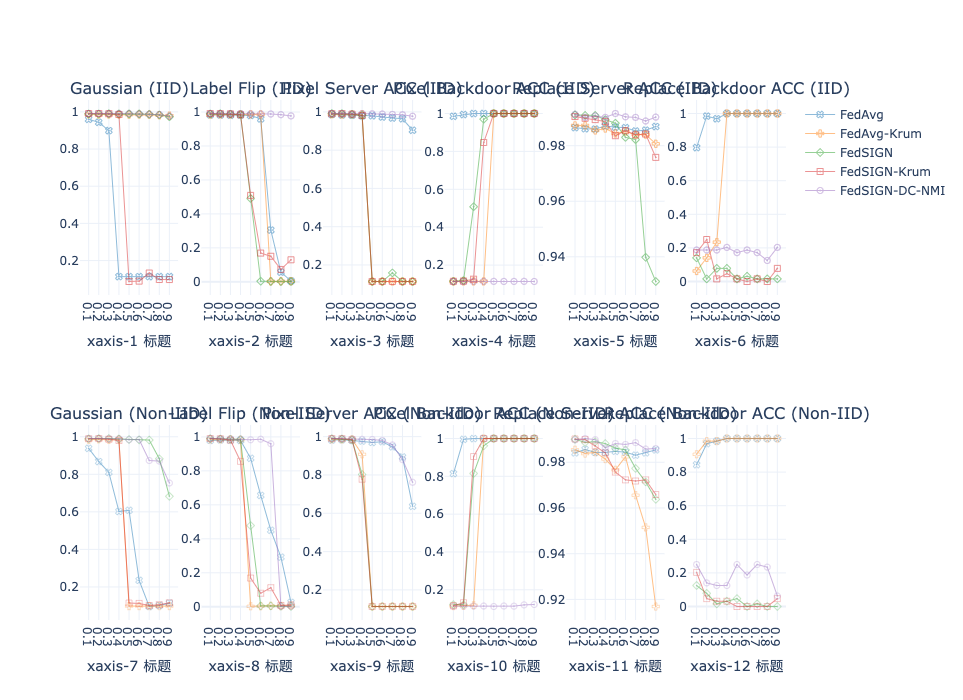

In [50]:
from turtle import color
import plotly


fig = make_subplots(
    rows=2, cols=6, 
    subplot_titles=\
    ("Gaussian (IID)", "Label Flip (IID)", "Pixel Server ACC (IID)", "Pixel Backdoor ACC (IID)",'Replace Server ACC (IID)','Replace Backdoor ACC (IID)',\
    "Gaussian (Non-IID)", "Label Flip (Non-IID)", "Pixel Server ACC (Non-IID)", "Pixel Backdoor ACC (Non-IID)",'Replace Server ACC (Non-IID)','Replace Backdoor ACC (Non-IID)'  )
)

cols = plotly.colors.DEFAULT_PLOTLY_COLORS
s = 150
e = -1

x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y = [max(i[s:e]) for i in get_group_data('mnist','iid','gaussian','fedavg')]
mk = dict(symbol='x-open-dot',opacity=1,color=cols[0])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg'), row=1, col=1)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','gaussian','fedavg-krum')]
mk = dict(symbol='cross-open-dot',opacity=1,color=cols[1])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum'), row=1, col=1)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','gaussian','fedsign')]
mk = dict(symbol='diamond-open-dot',opacity=1,color=cols[2])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN'), row=1, col=1)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','gaussian','fedsign-krum')]
mk = dict(symbol='square-open-dot',opacity=1,color=cols[3])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum'), row=1, col=1)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','gaussian','fedsign-fadc-nmi')]
mk = dict(symbol='circle-open-dot',opacity=1,color=cols[4])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI'), row=1, col=1)

x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','gaussian','fedavg')]
mk = dict(symbol='x-open-dot',opacity=0.5,color=cols[0])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=2, col=1)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','gaussian','fedavg-krum')]
mk = dict(symbol='cross-open-dot',opacity=0.5,color=cols[1])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=2, col=1)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','gaussian','fedsign')]
mk = dict(symbol='diamond-open-dot',opacity=0.5,color=cols[2])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=2, col=1)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','gaussian','fedsign-krum')]
mk = dict(symbol='square-open-dot',opacity=0.5,color=cols[3])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=2, col=1)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','gaussian','fedsign-fadc-nmi')]
mk = dict(symbol='circle-open-dot',opacity=0.5,color=cols[4])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=2, col=1)

# label Flip
y = [max(i[s:e]) for i in get_group_data('mnist','iid','label','fedavg')]
mk = dict(symbol='x-open-dot',opacity=1,color=cols[0])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=1, col=2)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','label','fedavg-krum')]
mk = dict(symbol='cross-open-dot',opacity=1,color=cols[1])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=1, col=2)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','label','fedsign')]
mk = dict(symbol='diamond-open-dot',opacity=1,color=cols[2])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=1, col=2)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','label','fedsign-krum')]
mk = dict(symbol='square-open-dot',opacity=1,color=cols[3])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=1, col=2)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','label','fedsign-fadc-nmi')]
mk = dict(symbol='circle-open-dot',opacity=1,color=cols[4])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=1, col=2)

x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','label','fedavg')]
mk = dict(symbol='x-open-dot',opacity=0.5,color=cols[0])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=2, col=2)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','label','fedavg-krum')]
mk = dict(symbol='cross-open-dot',opacity=0.5,color=cols[1])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=2, col=2)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','label','fedsign')]
mk = dict(symbol='diamond-open-dot',opacity=0.5,color=cols[2])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=2, col=2)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','label','fedsign-krum')]
mk = dict(symbol='square-open-dot',opacity=0.5,color=cols[3])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=2, col=2)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','label','fedsign-fadc-nmi')]
mk = dict(symbol='circle-open-dot',opacity=0.5,color=cols[4])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=2, col=2)


# Pixel
y = [max(i[s:e]) for i in get_group_data('mnist','iid','pixel','fedavg')]
mk = dict(symbol='x-open-dot',opacity=1,color=cols[0])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=1, col=3)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','pixel','fedavg-krum')]
mk = dict(symbol='cross-open-dot',opacity=1,color=cols[1])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=1, col=3)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','pixel','fedsign')]
mk = dict(symbol='diamond-open-dot',opacity=1,color=cols[2])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=1, col=3)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','pixel','fedsign-krum')]
mk = dict(symbol='square-open-dot',opacity=1,color=cols[3])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=1, col=3)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','pixel','fedsign-fadc-nmi')]
mk = dict(symbol='circle-open-dot',opacity=1,color=cols[4])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=1, col=3)

x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','pixel','fedavg')]
mk = dict(symbol='x-open-dot',opacity=0.5,color=cols[0])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=2, col=3)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','pixel','fedavg-krum')]
mk = dict(symbol='cross-open-dot',opacity=0.5,color=cols[1])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=2, col=3)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','pixel','fedsign')]
mk = dict(symbol='diamond-open-dot',opacity=0.5,color=cols[2])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=2, col=3)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','pixel','fedsign-krum')]
mk = dict(symbol='square-open-dot',opacity=0.5,color=cols[3])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=2, col=3)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','pixel','fedsign-fadc-nmi')]
mk = dict(symbol='circle-open-dot',opacity=0.5,color=cols[4])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=2, col=3)

y = [max(i[s:e]) for i in get_group_data('mnist','iid','pixel','fedavg','Attack_Acc')]
mk = dict(symbol='x-open-dot',opacity=1,color=cols[0])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=1, col=4)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','pixel','fedavg-krum','Attack_Acc')]
mk = dict(symbol='cross-open-dot',opacity=1,color=cols[1])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=1, col=4)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','pixel','fedsign','Attack_Acc')]
mk = dict(symbol='diamond-open-dot',opacity=1,color=cols[2])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=1, col=4)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','pixel','fedsign-krum','Attack_Acc')]
mk = dict(symbol='square-open-dot',opacity=1,color=cols[3])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=1, col=4)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','pixel','fedsign-fadc-nmi','Attack_Acc')]
mk = dict(symbol='circle-open-dot',opacity=1,color=cols[4])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=1, col=4)

x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','pixel','fedavg','Attack_Acc')]
mk = dict(symbol='x-open-dot',opacity=0.5,color=cols[0])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=2, col=4)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','pixel','fedavg-krum','Attack_Acc')]
mk = dict(symbol='cross-open-dot',opacity=0.5,color=cols[1])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=2, col=4)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','pixel','fedsign','Attack_Acc')]
mk = dict(symbol='diamond-open-dot',opacity=0.5,color=cols[2])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=2, col=4)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','pixel','fedsign-krum','Attack_Acc')]
mk = dict(symbol='square-open-dot',opacity=0.5,color=cols[3])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=2, col=4)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','pixel','fedsign-fadc-nmi','Attack_Acc')]
mk = dict(symbol='circle-open-dot',opacity=0.5,color=cols[4])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=2, col=4)


# replace
y = [max(i[s:e]) for i in get_group_data('mnist','iid','replace','fedavg')]
mk = dict(symbol='x-open-dot',opacity=1,color=cols[0])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=1, col=5)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','replace','fedavg-krum')]
mk = dict(symbol='cross-open-dot',opacity=1,color=cols[1])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=1, col=5)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','replace','fedsign')]
mk = dict(symbol='diamond-open-dot',opacity=1,color=cols[2])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=1, col=5)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','replace','fedsign-krum')]
mk = dict(symbol='square-open-dot',opacity=1,color=cols[3])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=1, col=5)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','replace','fedsign-fadc-nmi')]
mk = dict(symbol='circle-open-dot',opacity=1,color=cols[4])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=1, col=5)

y = [max(i[s:e]) for i in get_group_data('mnist','noniid','replace','fedavg')]
mk = dict(symbol='x-open-dot',opacity=0.5,color=cols[0])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=2, col=5)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','replace','fedavg-krum')]
mk = dict(symbol='cross-open-dot',opacity=0.5,color=cols[1])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=2, col=5)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','replace','fedsign')]
mk = dict(symbol='diamond-open-dot',opacity=0.5,color=cols[2])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=2, col=5)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','replace','fedsign-krum')]
mk = dict(symbol='square-open-dot',opacity=0.5,color=cols[3])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=2, col=5)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','replace','fedsign-fadc-nmi')]
mk = dict(symbol='circle-open-dot',opacity=0.5,color=cols[4])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=2, col=5)

y = [max(i[s:e]) for i in get_group_data('mnist','iid','replace','fedavg','Attack_Acc')]
mk = dict(symbol='x-open-dot',opacity=1,color=cols[0])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=1, col=6)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','replace','fedavg-krum','Attack_Acc')]
mk = dict(symbol='cross-open-dot',opacity=1,color=cols[1])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=1, col=6)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','replace','fedsign','Attack_Acc')]
mk = dict(symbol='diamond-open-dot',opacity=1,color=cols[2])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=1, col=6)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','replace','fedsign-krum','Attack_Acc')]
mk = dict(symbol='square-open-dot',opacity=1,color=cols[3])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=1, col=6)
y = [max(i[s:e]) for i in get_group_data('mnist','iid','replace','fedsign-fadc-nmi','Attack_Acc')]
mk = dict(symbol='circle-open-dot',opacity=1,color=cols[4])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=1, col=6)

y = [max(i[s:e]) for i in get_group_data('mnist','noniid','replace','fedavg','Attack_Acc')]
mk = dict(symbol='x-open-dot',opacity=0.5,color=cols[0])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=2, col=6)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','replace','fedavg-krum','Attack_Acc')]
mk = dict(symbol='cross-open-dot',opacity=0.5,color=cols[1])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=2, col=6)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','replace','fedsign','Attack_Acc')]
mk = dict(symbol='diamond-open-dot',opacity=0.5,color=cols[2])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=2, col=6)
y = [max(i[s:e]) for i in get_group_data('mnist','noniid','replace','fedsign-krum','Attack_Acc')]
mk = dict(symbol='square-open-dot',opacity=0.5,color=cols[3])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=2, col=6)
y = [max(i[190:e]) for i in get_group_data('mnist','noniid','replace','fedsign-fadc-nmi','Attack_Acc')]
mk = dict(symbol='circle-open-dot',opacity=0.5,color=cols[4])
fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=2, col=6)

fig.update_xaxes(title_text="xaxis-1 标题", tickvals=x, row=1, col=1)
fig.update_xaxes(title_text="xaxis-2 标题", tickvals=x, row=1, col=2)
fig.update_xaxes(title_text="xaxis-3 标题", tickvals=x, row=1, col=3)
fig.update_xaxes(title_text="xaxis-4 标题", tickvals=x, row=1, col=4)
fig.update_xaxes(title_text="xaxis-5 标题", tickvals=x, row=1, col=5)
fig.update_xaxes(title_text="xaxis-6 标题", tickvals=x, row=1, col=6)
fig.update_xaxes(title_text="xaxis-7 标题", tickvals=x, row=2, col=1)
fig.update_xaxes(title_text="xaxis-8 标题", tickvals=x, row=2, col=2)
fig.update_xaxes(title_text="xaxis-9 标题", tickvals=x, row=2, col=3)
fig.update_xaxes(title_text="xaxis-10 标题", tickvals=x, row=2, col=4)
fig.update_xaxes(title_text="xaxis-11 标题", tickvals=x, row=2, col=5)
fig.update_xaxes(title_text="xaxis-12 标题", tickvals=x, row=2, col=6)

fig.update_coloraxes(overwrite=False)


fig.update_layout(height=700,width=2000)
fig.show()


In [7]:
from turtle import color
import plotly

def draw(dataset='mnist'):
    fig = make_subplots(
        rows=2, cols=6, 
        subplot_titles=\
        ("Gaussian (IID)", "Label Flip (IID)", "Pixel Server ACC (IID)", "Pixel Backdoor ACC (IID)",'Replace Server ACC (IID)','Replace Backdoor ACC (IID)',\
        "Gaussian (Non-IID)", "Label Flip (Non-IID)", "Pixel Server ACC (Non-IID)", "Pixel Backdoor ACC (Non-IID)",'Replace Server ACC (Non-IID)','Replace Backdoor ACC (Non-IID)'  )
    )

    cols = plotly.colors.DEFAULT_PLOTLY_COLORS
    s = 150
    e = -1

    x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','gaussian','fedavg')]
    mk = dict(symbol='x-open-dot',opacity=1,color=cols[0])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg'), row=1, col=1)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','gaussian','fedavg-krum')]
    mk = dict(symbol='cross-open-dot',opacity=1,color=cols[1])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum'), row=1, col=1)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','gaussian','fedsign')]
    mk = dict(symbol='diamond-open-dot',opacity=1,color=cols[2])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN'), row=1, col=1)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','gaussian','fedsign-krum')]
    mk = dict(symbol='square-open-dot',opacity=1,color=cols[3])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum'), row=1, col=1)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','gaussian','fedsign-fadc-nmi')]
    mk = dict(symbol='circle-open-dot',opacity=1,color=cols[4])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI'), row=1, col=1)

    x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','gaussian','fedavg')]
    mk = dict(symbol='x-open-dot',opacity=0.5,color=cols[0])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=2, col=1)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','gaussian','fedavg-krum')]
    mk = dict(symbol='cross-open-dot',opacity=0.5,color=cols[1])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=2, col=1)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','gaussian','fedsign')]
    mk = dict(symbol='diamond-open-dot',opacity=0.5,color=cols[2])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=2, col=1)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','gaussian','fedsign-krum')]
    mk = dict(symbol='square-open-dot',opacity=0.5,color=cols[3])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=2, col=1)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','gaussian','fedsign-fadc-nmi')]
    mk = dict(symbol='circle-open-dot',opacity=0.5,color=cols[4])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=2, col=1)

    # label Flip
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','label','fedavg')]
    mk = dict(symbol='x-open-dot',opacity=1,color=cols[0])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=1, col=2)
    if dataset == 'cifar10':
        kkk=True
    else:
        kkk=False
    y = [max(i[190:e]) for i in get_group_data(dataset,'iid','label','fedavg-krum',mean_value=kkk)]
    mk = dict(symbol='cross-open-dot',opacity=1,color=cols[1])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=1, col=2)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','label','fedsign')]
    mk = dict(symbol='diamond-open-dot',opacity=1,color=cols[2])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=1, col=2)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','label','fedsign-krum')]
    mk = dict(symbol='square-open-dot',opacity=1,color=cols[3])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=1, col=2)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','label','fedsign-fadc-nmi')]
    mk = dict(symbol='circle-open-dot',opacity=1,color=cols[4])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=1, col=2)

    x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','label','fedavg')]
    mk = dict(symbol='x-open-dot',opacity=0.5,color=cols[0])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=2, col=2)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','label','fedavg-krum')]
    mk = dict(symbol='cross-open-dot',opacity=0.5,color=cols[1])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=2, col=2)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','label','fedsign')]
    mk = dict(symbol='diamond-open-dot',opacity=0.5,color=cols[2])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=2, col=2)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','label','fedsign-krum')]
    mk = dict(symbol='square-open-dot',opacity=0.5,color=cols[3])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=2, col=2)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','label','fedsign-fadc-nmi')]
    mk = dict(symbol='circle-open-dot',opacity=0.5,color=cols[4])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=2, col=2)


    # Pixel
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','pixel','fedavg')]
    mk = dict(symbol='x-open-dot',opacity=1,color=cols[0])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=1, col=3)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','pixel','fedavg-krum')]
    mk = dict(symbol='cross-open-dot',opacity=1,color=cols[1])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=1, col=3)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','pixel','fedsign')]
    mk = dict(symbol='diamond-open-dot',opacity=1,color=cols[2])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=1, col=3)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','pixel','fedsign-krum')]
    mk = dict(symbol='square-open-dot',opacity=1,color=cols[3])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=1, col=3)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','pixel','fedsign-fadc-nmi')]
    mk = dict(symbol='circle-open-dot',opacity=1,color=cols[4])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=1, col=3)

    x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','pixel','fedavg')]
    mk = dict(symbol='x-open-dot',opacity=0.5,color=cols[0])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=2, col=3)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','pixel','fedavg-krum')]
    mk = dict(symbol='cross-open-dot',opacity=0.5,color=cols[1])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=2, col=3)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','pixel','fedsign')]
    mk = dict(symbol='diamond-open-dot',opacity=0.5,color=cols[2])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=2, col=3)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','pixel','fedsign-krum')]
    mk = dict(symbol='square-open-dot',opacity=0.5,color=cols[3])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=2, col=3)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','pixel','fedsign-fadc-nmi')]
    mk = dict(symbol='circle-open-dot',opacity=0.5,color=cols[4])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=2, col=3)

    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','pixel','fedavg','Attack_Acc')]
    mk = dict(symbol='x-open-dot',opacity=1,color=cols[0])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=1, col=4)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','pixel','fedavg-krum','Attack_Acc')]
    mk = dict(symbol='cross-open-dot',opacity=1,color=cols[1])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=1, col=4)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','pixel','fedsign','Attack_Acc')]
    mk = dict(symbol='diamond-open-dot',opacity=1,color=cols[2])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=1, col=4)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','pixel','fedsign-krum','Attack_Acc')]
    mk = dict(symbol='square-open-dot',opacity=1,color=cols[3])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=1, col=4)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','pixel','fedsign-fadc-nmi','Attack_Acc')]
    mk = dict(symbol='circle-open-dot',opacity=1,color=cols[4])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=1, col=4)

    x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','pixel','fedavg','Attack_Acc')]
    mk = dict(symbol='x-open-dot',opacity=0.5,color=cols[0])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=2, col=4)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','pixel','fedavg-krum','Attack_Acc')]
    mk = dict(symbol='cross-open-dot',opacity=0.5,color=cols[1])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=2, col=4)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','pixel','fedsign','Attack_Acc')]
    mk = dict(symbol='diamond-open-dot',opacity=0.5,color=cols[2])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=2, col=4)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','pixel','fedsign-krum','Attack_Acc')]
    mk = dict(symbol='square-open-dot',opacity=0.5,color=cols[3])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=2, col=4)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','pixel','fedsign-fadc-nmi','Attack_Acc')]
    mk = dict(symbol='circle-open-dot',opacity=0.5,color=cols[4])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=2, col=4)


    # replace
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','replace','fedavg')]
    mk = dict(symbol='x-open-dot',opacity=1,color=cols[0])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=1, col=5)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','replace','fedavg-krum')]
    mk = dict(symbol='cross-open-dot',opacity=1,color=cols[1])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=1, col=5)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','replace','fedsign')]
    mk = dict(symbol='diamond-open-dot',opacity=1,color=cols[2])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=1, col=5)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','replace','fedsign-krum')]
    mk = dict(symbol='square-open-dot',opacity=1,color=cols[3])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=1, col=5)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','replace','fedsign-fadc-nmi')]
    mk = dict(symbol='circle-open-dot',opacity=1,color=cols[4])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=1, col=5)

    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','replace','fedavg',mean_value=True)]
    mk = dict(symbol='x-open-dot',opacity=0.5,color=cols[0])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=2, col=5)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','replace','fedavg-krum',mean_value=True)]
    mk = dict(symbol='cross-open-dot',opacity=0.5,color=cols[1])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=2, col=5)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','replace','fedsign',mean_value=True)]
    mk = dict(symbol='diamond-open-dot',opacity=0.5,color=cols[2])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=2, col=5)
    y = [max(i[190:e]) for i in get_group_data(dataset,'noniid','replace','fedsign-krum',mean_value=True)]
    mk = dict(symbol='square-open-dot',opacity=0.5,color=cols[3])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=2, col=5)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','replace','fedsign-fadc-nmi',mean_value=True)]
    mk = dict(symbol='circle-open-dot',opacity=0.5,color=cols[4])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=2, col=5)

    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','replace','fedavg','Attack_Acc')]
    mk = dict(symbol='x-open-dot',opacity=1,color=cols[0])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=1, col=6)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','replace','fedavg-krum','Attack_Acc')]
    mk = dict(symbol='cross-open-dot',opacity=1,color=cols[1])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=1, col=6)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','replace','fedsign','Attack_Acc')]
    mk = dict(symbol='diamond-open-dot',opacity=1,color=cols[2])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=1, col=6)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','replace','fedsign-krum','Attack_Acc')]
    mk = dict(symbol='square-open-dot',opacity=1,color=cols[3])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=1, col=6)
    y = [max(i[s:e]) for i in get_group_data(dataset,'iid','replace','fedsign-fadc-nmi','Attack_Acc')]
    mk = dict(symbol='circle-open-dot',opacity=1,color=cols[4])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=1, col=6)

    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','replace','fedavg','Attack_Acc',mean_value=True)]
    mk = dict(symbol='x-open-dot',opacity=0.5,color=cols[0])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[0]),opacity=0.5,name='FedAvg',showlegend=False), row=2, col=6)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','replace','fedavg-krum','Attack_Acc',mean_value=True)]
    mk = dict(symbol='cross-open-dot',opacity=0.5,color=cols[1])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[1]),opacity=0.5,name='FedAvg-Krum',showlegend=False), row=2, col=6)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','replace','fedsign','Attack_Acc',mean_value=True)]
    mk = dict(symbol='diamond-open-dot',opacity=0.5,color=cols[2])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[2]),opacity=0.5,name='FedSIGN',showlegend=False), row=2, col=6)
    y = [max(i[s:e]) for i in get_group_data(dataset,'noniid','replace','fedsign-krum','Attack_Acc',mean_value=True)]
    mk = dict(symbol='square-open-dot',opacity=0.5,color=cols[3])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[3]),opacity=0.5,name='FedSIGN-Krum',showlegend=False), row=2, col=6)
    y = [max(i[190:e]) for i in get_group_data(dataset,'noniid','replace','fedsign-fadc-nmi','Attack_Acc',mean_value=True)]
    mk = dict(symbol='circle-open-dot',opacity=0.5,color=cols[4])
    fig.add_trace(go.Scatter(x=x, y=y,marker=mk,line=dict(width=1,color=cols[4]),opacity=0.5,name='FedSIGN-DC-NMI',showlegend=False), row=2, col=6)

    fig.update_xaxes(title_text="xaxis-1 标题", tickvals=x, row=1, col=1)
    fig.update_xaxes(title_text="xaxis-2 标题", tickvals=x, row=1, col=2)
    fig.update_xaxes(title_text="xaxis-3 标题", tickvals=x, row=1, col=3)
    fig.update_xaxes(title_text="xaxis-4 标题", tickvals=x, row=1, col=4)
    fig.update_xaxes(title_text="xaxis-5 标题", tickvals=x, row=1, col=5)
    fig.update_xaxes(title_text="xaxis-6 标题", tickvals=x, row=1, col=6)
    fig.update_xaxes(title_text="xaxis-7 标题", tickvals=x, row=2, col=1)
    fig.update_xaxes(title_text="xaxis-8 标题", tickvals=x, row=2, col=2)
    fig.update_xaxes(title_text="xaxis-9 标题", tickvals=x, row=2, col=3)
    fig.update_xaxes(title_text="xaxis-10 标题", tickvals=x, row=2, col=4)
    fig.update_xaxes(title_text="xaxis-11 标题", tickvals=x, row=2, col=5)
    fig.update_xaxes(title_text="xaxis-12 标题", tickvals=x, row=2, col=6)

    fig.update_coloraxes(overwrite=False)


    fig.update_layout(height=700,width=2000)
    fig.show()



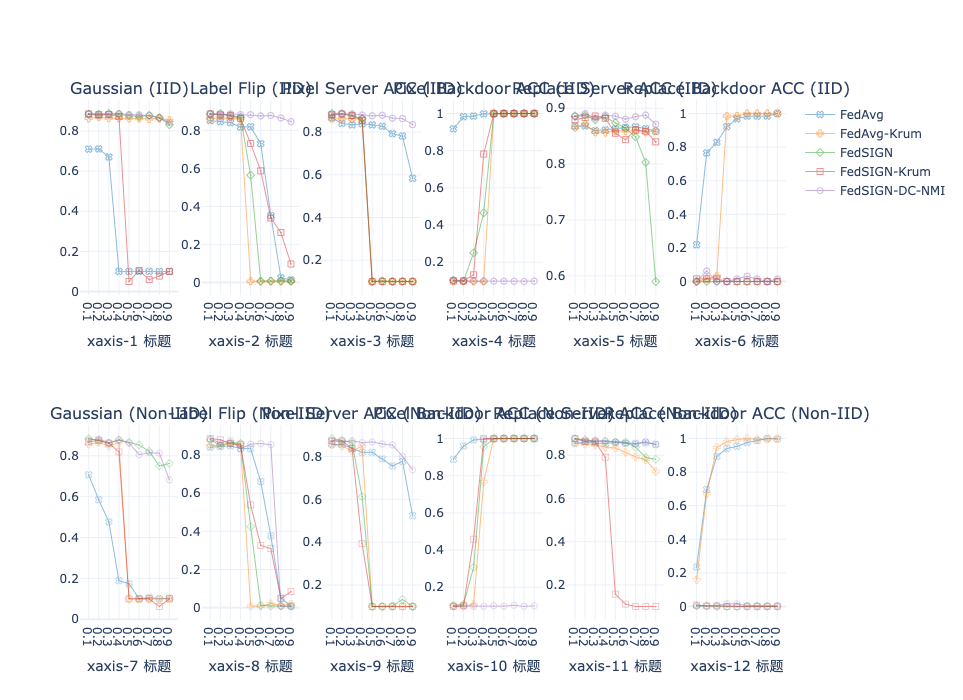

In [10]:
draw('fmnist')

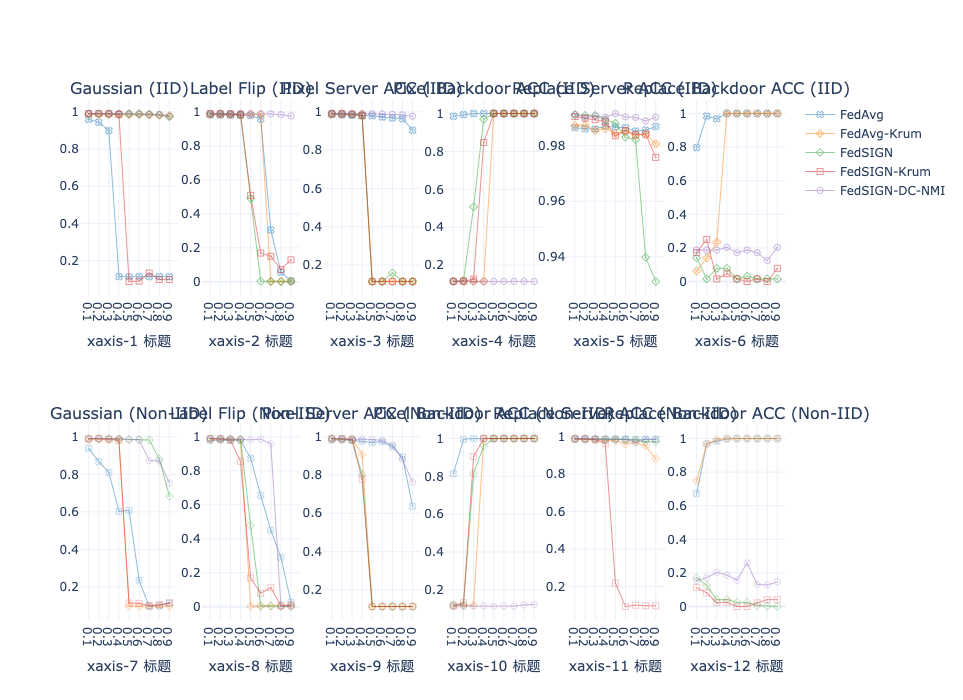

In [9]:
draw('mnist')

/tmp/ipykernel_3560396/1341468386.py:53: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



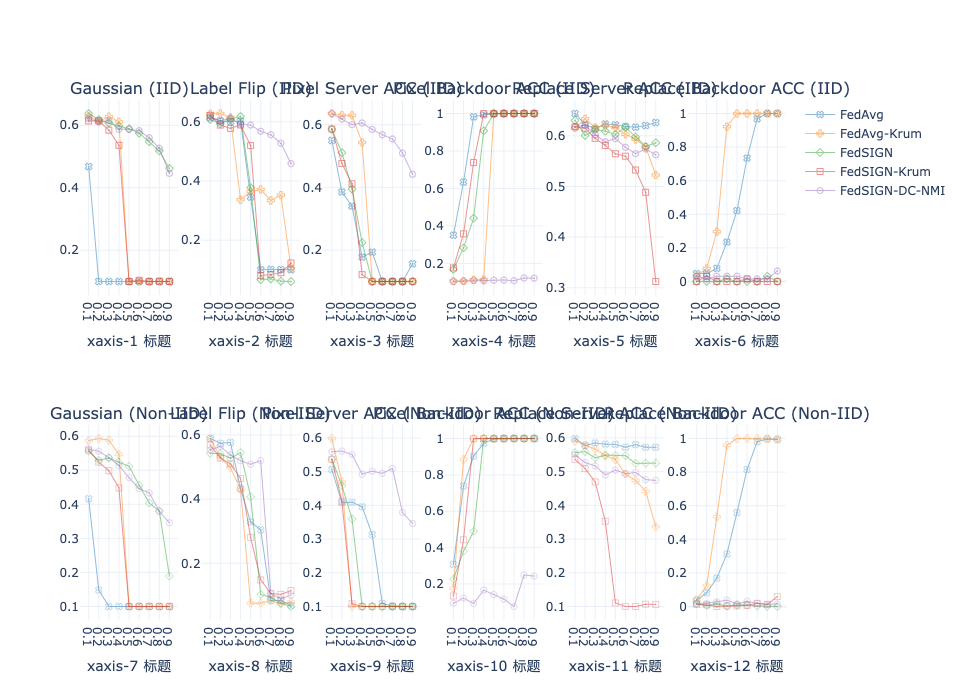

In [8]:
draw('cifar10')


In [7]:
def makepd_data(dataset='mnist'):
    df = pd.DataFrame()
    rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]*4*5
    score = []
    name = []
    color = []


    name = name + ['Gaussian (IID)']*9*5
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','gaussian','fedavg')]
    color = color + ['Fedavg']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','gaussian','fedavg-krum')]
    color = color + ['Fedavg-Krum']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','gaussian','fedsign')]
    color = color + ['FedSIGN']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','gaussian','fedsign-krum')]
    color = color + ['FedSIGN-Krum']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','gaussian','fedsign-fadc-nmi')]
    color = color + ['FedSIGN-DC-NMI']*9

    name = name + ['Label Flip (IID)']*9*5
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','label','fedavg')]
    color = color + ['Fedavg']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','label','fedavg-krum')]
    color = color + ['Fedavg-Krum']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','label','fedsign')]
    color = color + ['FedSIGN']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','label','fedsign-krum')]
    color = color + ['FedSIGN-Krum']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','label','fedsign-fadc-nmi')]
    color = color + ['FedSIGN-DC-NMI']*9

    name = name + ['Pixel Server ACC (IID)']*9*5
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','pixel','fedavg')]
    color = color + ['Fedavg']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','pixel','fedavg-krum')]
    color = color + ['Fedavg-Krum']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','pixel','fedsign')]
    color = color + ['FedSIGN']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','pixel','fedsign-krum')]
    color = color + ['FedSIGN-Krum']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','pixel','fedsign-fadc-nmi')]
    color = color + ['FedSIGN-DC-NMI']*9

    name = name + ['Pixel Backdoor ACC (IID)']*9*5
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','pixel','fedavg','Attack_Acc')]
    color = color + ['Fedavg']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','pixel','fedavg-krum','Attack_Acc')]
    color = color + ['Fedavg-Krum']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','pixel','fedsign','Attack_Acc')]
    color = color + ['FedSIGN']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','pixel','fedsign-krum','Attack_Acc')]
    color = color + ['FedSIGN-Krum']*9
    score = score + [max(i[:150]) for i in get_group_data(dataset,'iid','pixel','fedsign-fadc-nmi','Attack_Acc')]
    color = color + ['FedSIGN-DC-NMI']*9

    df['rate'] = rate
    df['score'] = score
    df['name'] = name
    df['color'] = color

    return df

mnist_df = makepd_data()

In [13]:
[sum(i[160:])/40 for i in get_group_data('mnist','noniid','replace','fedsign-fadc-nmi','Attack_Acc',attack_round=160)]

[0.218359375,
 0.065234375,
 0.14609375,
 0.237890625,
 0.058203125,
 0.174609375,
 0.187109375,
 0.116796875,
 0.0921875]

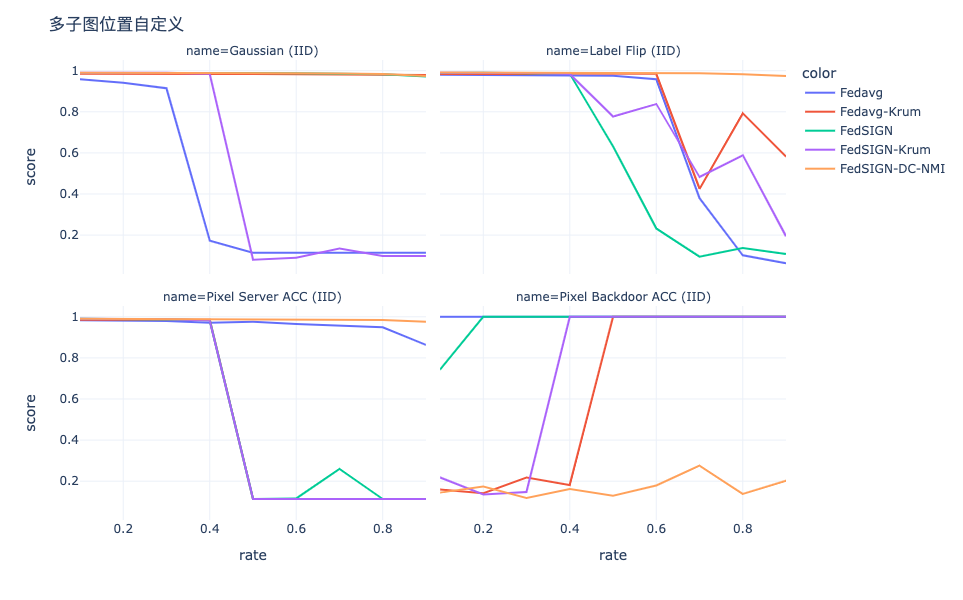

In [7]:

fig = px.line(mnist_df,   # 数据集
                 x='rate',  # x、y、颜色、点的大小size
                 y='score', 
                 color='color', 
                 facet_col='name', # 列切面字段
                 facet_col_wrap=2 # 每行最多3个图形
                )
fig.update_xaxes(matches=None)
fig.update_layout(height=600, 
                  width=1500, 
                  title_text="多子图位置自定义")
fig.show()

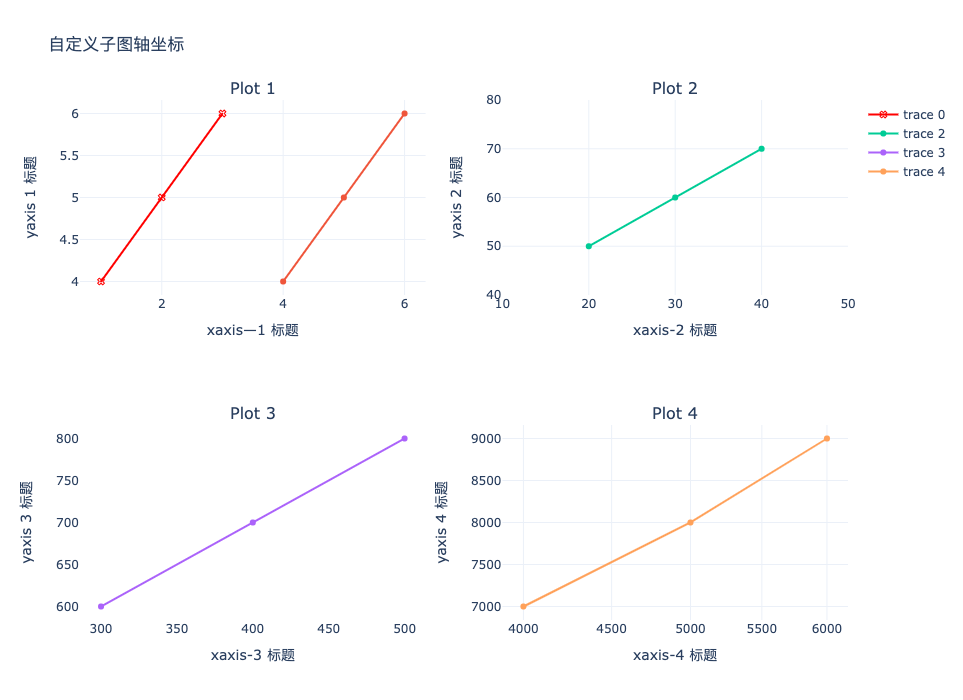

In [8]:
# 绘制mnist所有的攻击表
from turtle import color


fig = make_subplots(
    rows=2, cols=2, subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4")
)
fig = make_subplots(
    rows=2, 
    cols=2, 
    subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4")
)

# 添加不同数据
fig.add_trace(go.Scatter(x=[1, 2, 3], 
                         y=[4, 5, 6],
                         marker = dict(
                            color='red',
                            symbol='x-open-dot',
                         )
                         ), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=[4, 5, 6], 
                         y=[4, 5, 6],
                         showlegend=False
                         ), 
              row=1, col=1)
fig.add_trace(go.Scatter(x=[20, 30, 40], 
                         y=[50, 60, 70],
                         ), 
              row=1, col=2)
fig.add_trace(go.Scatter(x=[300, 400, 500], 
                         y=[600, 700, 800],
                         ), 
              row=2, col=1)

fig.add_trace(go.Scatter(x=[4000, 5000, 6000], 
                         y=[7000, 8000, 9000],
                         ), 
              row=2, col=2)

# 自定义x轴
fig.update_xaxes(title_text="xaxis—1 标题", row=1, col=1)  # 正常显示
fig.update_xaxes(title_text="xaxis-2 标题", range=[10, 50], row=1, col=2)  # 设置范围range
fig.update_xaxes(title_text="xaxis-3 标题", showgrid=False, row=2, col=1)  # 不显示网格线
fig.update_xaxes(title_text="xaxis-4 标题", type="log", row=2, col=2)  # 基于对数

# 自定义y轴
fig.update_yaxes(title_text="yaxis 1 标题", row=1, col=1)
fig.update_yaxes(title_text="yaxis 2 标题", range=[40, 80], row=1, col=2)
fig.update_yaxes(title_text="yaxis 3 标题", showgrid=False, row=2, col=1)
fig.update_yaxes(title_text="yaxis 4 标题", row=2, col=2)

# Update title and height
fig.update_layout(title_text="自定义子图轴坐标", height=700)

fig.show()


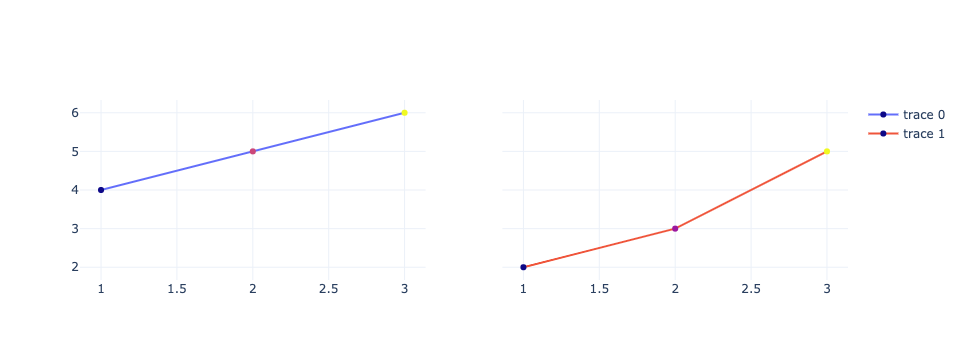

In [9]:
fig = make_subplots(rows=1, cols=2, 
                    shared_yaxes=True)   # 在y轴方向上共享

fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6],
                    marker=dict(color=[4, 5, 6])),
              1, 1)  # 直接表示位置在(1,1)

fig.add_trace(go.Scatter(x=[1, 2, 3], y=[2, 3, 5],
                    marker=dict(color=[2, 3, 5])),
              1, 2) # 位置在(1,2)

fig.update_layout(  # 颜色轴
                  showlegend=True)  # 不显示图例

fig.show()

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

def plot_group_score(score_gruop,name,save=False):
    x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]       # 产生0~8间隔为一的列表
    # data1 = [1, 4, 9, 16, 25, 36, 49, 64] # 列表squares数据是y轴的值
    # data1 = max_score
    # data2 = [1, 3, 6, 10, 15, 21, 28, 36]

    plt.figure(figsize=(20,10))

    # '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    if type(score_gruop) == dict:
        color = ['y','red','orange','green','blue']
        idx = -1
        for i,(key,value) in enumerate(score_gruop.items()):
                if 'noniid' in key:
                        line = 'dashed'
                else:
                        line = 'solid'
                        idx = idx + 1
                # print(idx)

                plt.plot(x,#x轴
                        value,#y轴
                        linestyle = line, # 折线类型
                        linewidth = 2, # 折线宽度
                        color=color[idx],
                        marker = 'o', # 点的形状
                        markersize = 6, # 点的大小
                        markeredgecolor='black', # 点的边框色
                        markerfacecolor=color[idx], # 点的填充色
                        label=key#标签
                )

    else:
        plt.plot(x,#x轴
                score_gruop,#y轴
                linestyle = 'dotted', # 折线类型
                linewidth = 2, # 折线宽度
                color='g',
                marker = 'o', # 点的形状
                markersize = 6, # 点的大小
                markeredgecolor='black', # 点的边框色
                markerfacecolor='g', # 点的填充色
                label='IID-FedAvg'#标签
        )

    # plt.plot(x, data2, 'r-.', label= 'data2')
    plt.legend(loc='upper right',handlelength=4)  # 像前面这样写是放在图外 # 表示多维数组中label在图表中位置
    plt.tight_layout(pad=5)                            # 设定空白的留白大小---将pad改为h_pad或w_pad可以分别设定高度或宽度的留白

    plt.axis([0, 1, 0, 1])                                    # 产生x刻度0~8、y刻度0~70
    # plt.text(0, 0.5, 'Deepen your mind')                        # 在图上标记文字
    plt.grid()                                                 # 产生网格
    # plt.plot(x, data1)
    plt.title(name, fontsize=24)                       # 图标标题
    plt.xlabel('Number of Attacker', fontsize=16)                           # x轴标题 --- fontsize 设置标题字体大小
    plt.ylabel('Server Acc', fontsize=16)                          # y轴标题 ---- xticks()设定刻度
    plt.tick_params(axis='both', color='red', labelsize=12)

    x_major_locator=MultipleLocator(0.1) #把x轴的刻度间隔设置为1，并存在变量里
    y_major_locator=MultipleLocator(0.1)  #把y轴的刻度间隔设置为10，并存在变量里
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator) #ax为两条坐标轴的实例
    ax.yaxis.set_major_locator(y_major_locator) #把x轴的主刻度设置为1的倍数

    plt.show()
    if save:
        plt.savefig('out_14.jpg',bbox_inches='tight')
plot_group_score(max_score,'Label Flip')


NameError: name 'max_score' is not defined

R_FedAVG_labelflip_iid_
R_FedAVG_labelflip_noniid_
R_Krumavg_labelflip_iid_
R_Krumavg_labelflip_noniid_
R_Krum_labelflip_iid_
R_Krum_labelflip_noniid_
R_sign_labelflip_iid_
R_sign_labelflip_noniid_
R_mipc_labelflip_iid_
R_mipc_labelflip_noniid_
{'R_FedAVG_labelflip_iid': [0.6147000193595886, 0.5978999733924866, 0.5993000268936157, 0.5997999906539917, 0.28189998865127563, 0.10000000149011612, 0.10109999775886536, 0.10000000149011612, 0.10000000149011612], 'R_FedAVG_labelflip_noniid': [0.5884000062942505, 0.574400007724762, 0.578000009059906, 0.4198000133037567, 0.30300000309944153, 0.2791000008583069, 0.07199999690055847, 0.07410000264644623, 0.0908999964594841], 'R_Krumavg_labelflip_iid': [0.6269000172615051, 0.6151999831199646, 0.6363000273704529, 0.08900000154972076, 0.5685999989509583, 0.07020000368356705, 0.06830000132322311, 0.45100000500679016, 0.08560000360012054], 'R_Krumavg_labelflip_noniid': [0.5879999995231628, 0.5241000056266785, 0.49889999628067017, 0.42559999227523804, 0.

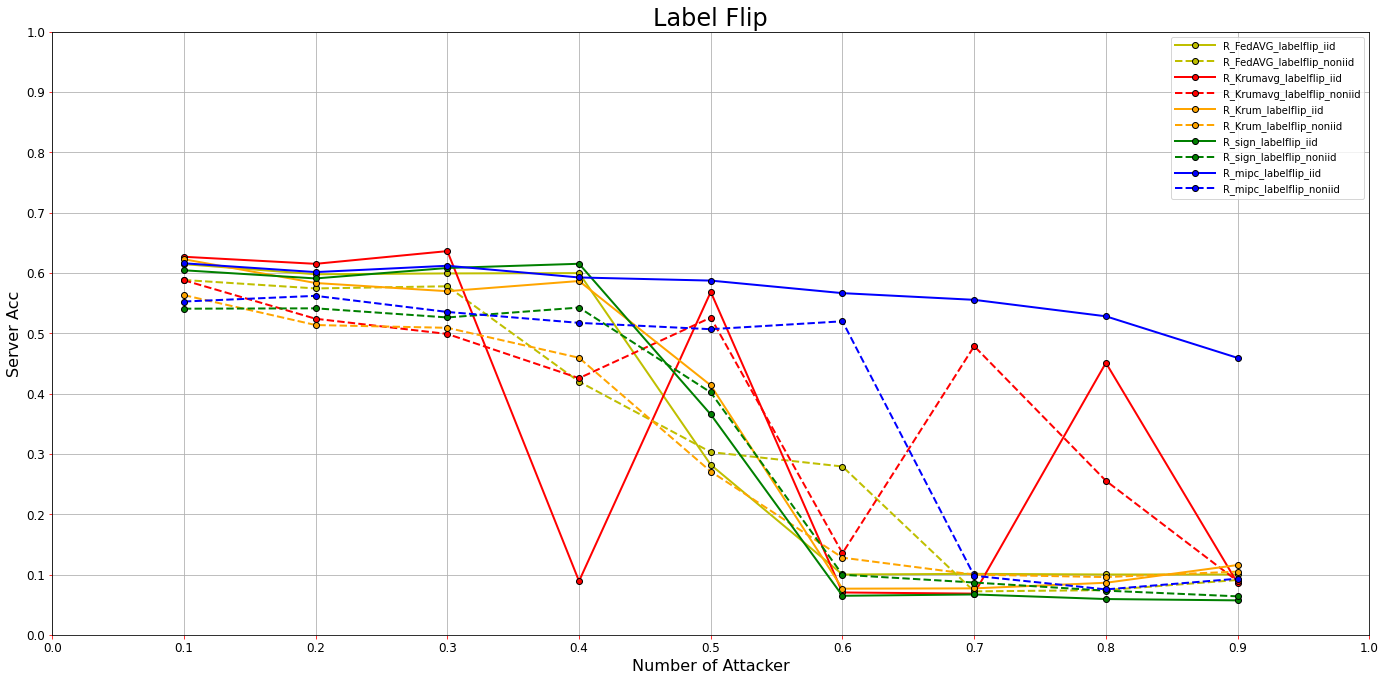

In [ ]:
# Label Flip

name_group = ['R_FedAVG_labelflip_iid_', 'R_FedAVG_labelflip_noniid_',
              'R_Krumavg_labelflip_iid_', 'R_Krumavg_labelflip_noniid_',
              'R_Krum_labelflip_iid_', 'R_Krum_labelflip_noniid_',
              'R_sign_labelflip_iid_', 'R_sign_labelflip_noniid_',
              'R_mipc_labelflip_iid_', 'R_mipc_labelflip_noniid_']
group_distr = ['iid','noniid',
                'iid','noniid',
                'iid','noniid',
                'iid','noniid',
                'iid','noniid']

group_value = {}
for i,j in zip(group_distr,name_group):
    print(j)
    all_value = get_group_data(distribution=i,name=j,attack_type='label') 
    tmp = [i[-1] for i in all_value]
    group_value[j[:-1]] = tmp

print(group_value)
plot_group_score(group_value,'Label Flip')

R_FedAVG_gaussian_iid_
R_FedAVG_gaussian_noniid_
R_Krumavg_gaussian_iid_
R_Krumavg_gaussian_noniid_
R_Krum_gaussian_iid_
R_Krum_gaussian_noniid_
R_sign_gaussian_iid_
R_sign_gaussian_noniid_
R_mipc_gaussian_iid_
R_mipc_gaussian_noniid_
{'R_FedAVG_gaussian_iid': [0.46380001306533813, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], 'R_FedAVG_gaussian_noniid': [0.4138000011444092, 0.14800000190734863, 0.10000000149011612, 0.10599999874830246, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], 'R_Krumavg_gaussian_iid': [0.6273000240325928, 0.6134999990463257, 0.6263999938964844, 0.6110000014305115, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], 'R_Krumavg_gaussian_noniid': [0.5527999997138977, 0.5903000235557556, 0.5867000222206116, 0.5426999926567078, 0.10000

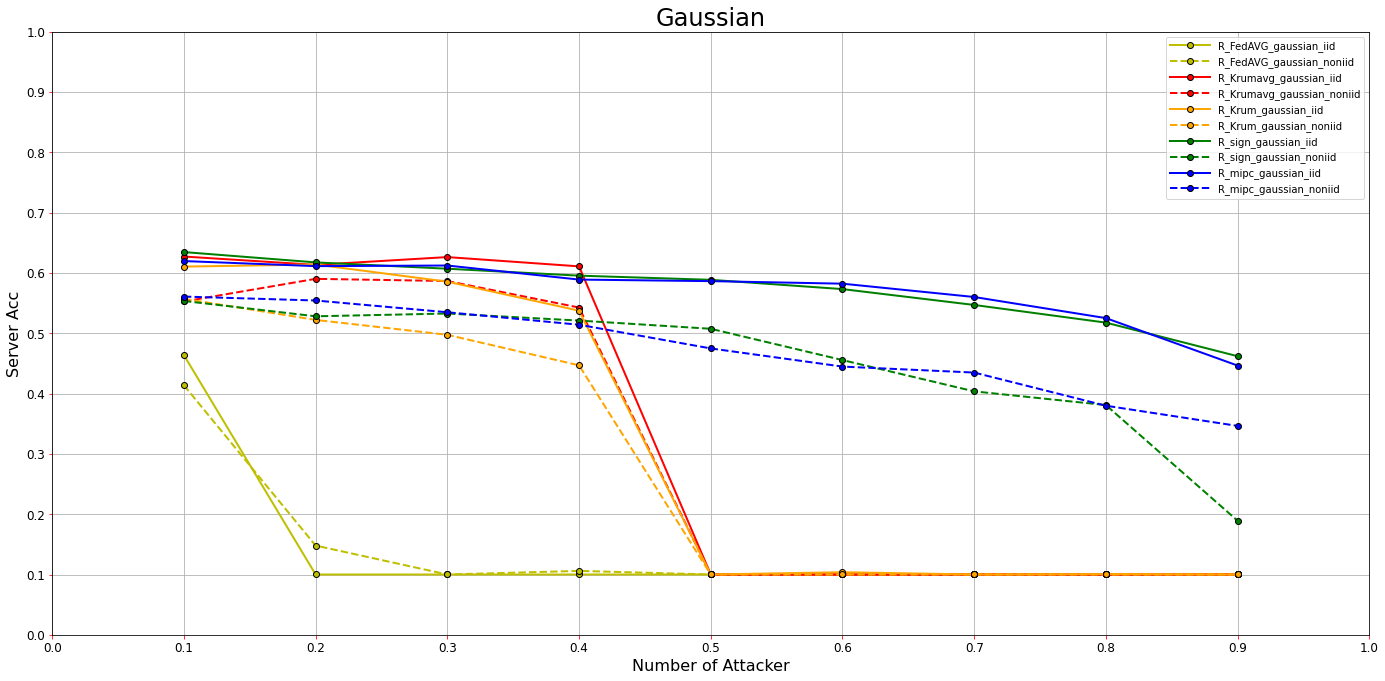

In [ ]:
# gaussian

name_group = ['R_FedAVG_gaussian_iid_', 'R_FedAVG_gaussian_noniid_',
              'R_Krumavg_gaussian_iid_', 'R_Krumavg_gaussian_noniid_',
              'R_Krum_gaussian_iid_', 'R_Krum_gaussian_noniid_',
              'R_sign_gaussian_iid_', 'R_sign_gaussian_noniid_',
              'R_mipc_gaussian_iid_', 'R_mipc_gaussian_noniid_']
group_distr = ['iid','noniid',
                'iid','noniid',
                'iid','noniid',
                'iid','noniid',
                'iid','noniid']

group_value = {}
for i,j in zip(group_distr,name_group):
    print(j)
    all_value = get_group_data(distribution=i,name=j,attack_type='gaussian') 
    tmp = [i[-1] for i in all_value]
    group_value[j[:-1]] = tmp

print(group_value)
plot_group_score(group_value,'Gaussian')

R_FedAVG_pixel_iid_
R_FedAVG_pixel_noniid_
R_Krumavg_pixel_iid_
R_Krumavg_pixel_noniid_
R_Krum_pixel_iid_
R_Krum_pixel_noniid_
R_sign_pixel_iid_
R_sign_pixel_noniid_
R_mipc_pixel_iid_
R_mipc_pixel_noniid_
{'R_FedAVG_pixel_iid': [0.5228999853134155, 0.376800000667572, 0.25290000438690186, 0.14180000126361847, 0.19220000505447388, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16140000522136688], 'R_FedAVG_pixel_noniid': [0.5019000172615051, 0.40529999136924744, 0.4088999927043915, 0.38269999623298645, 0.3239000141620636, 0.24230000376701355, 0.1005999967455864, 0.10000000149011612, 0.10000000149011612], 'R_Krumavg_pixel_iid': [0.6352999806404114, 0.6291999816894531, 0.6270999908447266, 0.541100025177002, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], 'R_Krumavg_pixel_noniid': [0.5947999954223633, 0.35659998655319214, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.100000001

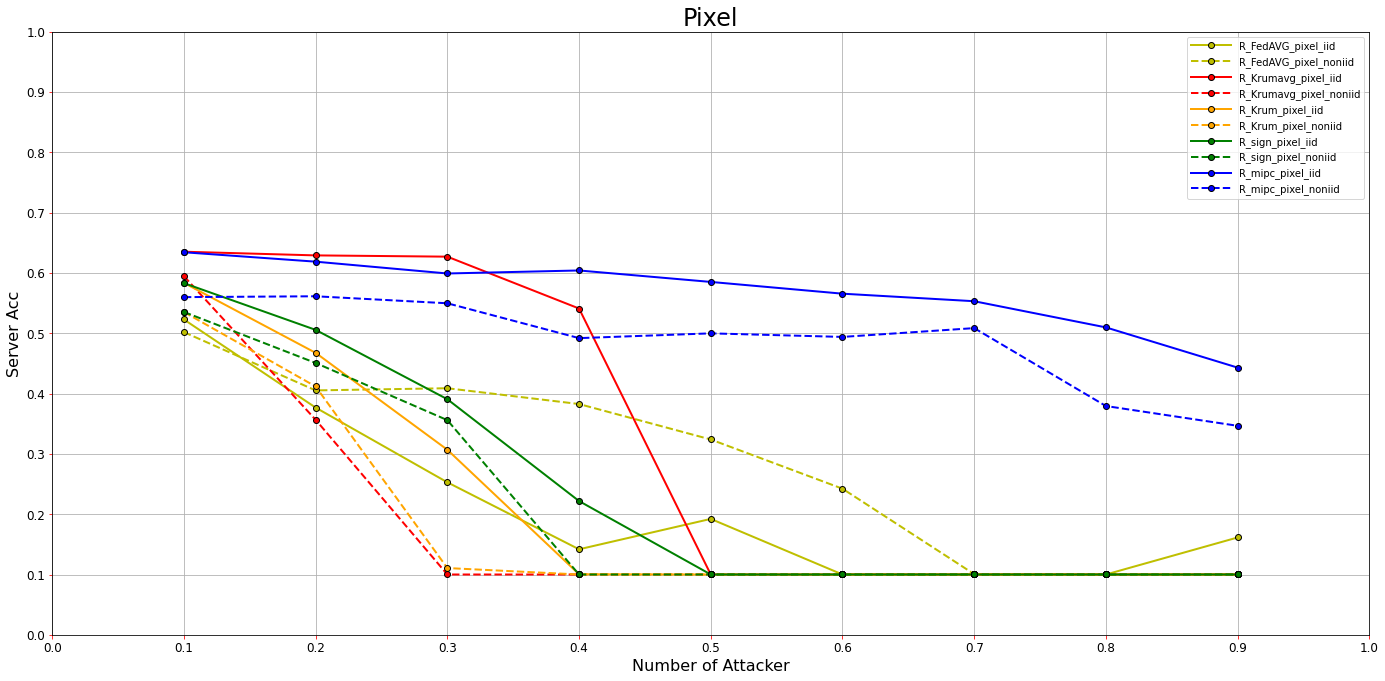

In [ ]:
name_group = ['R_FedAVG_pixel_iid_', 'R_FedAVG_pixel_noniid_',
              'R_Krumavg_pixel_iid_', 'R_Krumavg_pixel_noniid_',
              'R_Krum_pixel_iid_', 'R_Krum_pixel_noniid_',
              'R_sign_pixel_iid_', 'R_sign_pixel_noniid_',
              'R_mipc_pixel_iid_', 'R_mipc_pixel_noniid_']
group_distr = ['iid','noniid',
                'iid','noniid',
                'iid','noniid',
                'iid','noniid',
                'iid','noniid']

group_value = {}
for i,j in zip(group_distr,name_group):
    print(j)
    all_value = get_group_data(distribution=i,name=j,attack_type='pixel') 
    tmp = [i[-1] for i in all_value]
    group_value[j[:-1]] = tmp

print(group_value)
plot_group_score(group_value,'Pixel')

R_FedAVG_replace_iid_
R_FedAVG_replace_noniid_
R_Krumavg_replace_iid_
R_Krumavg_replace_noniid_
R_Krum_replace_iid_
R_Krum_replace_noniid_
R_sign_replace_iid_
R_sign_replace_noniid_
R_mipc_replace_iid_
R_mipc_replace_noniid_
{'R_FedAVG_replace_iid': [0.5235000252723694, 0.4090000092983246, 0.28529998660087585, 0.16779999434947968, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], 'R_FedAVG_replace_noniid': [0.4632999897003174, 0.37540000677108765, 0.3262999951839447, 0.296099990606308, 0.1956000030040741, 0.11150000244379044, 0.10000000149011612, 0.09229999780654907, 0.10000000149011612], 'R_Krumavg_replace_iid': [0.6466000080108643, 0.6259999871253967, 0.6116999983787537, 0.6241000294685364, 0.6169000267982483, 0.6074000000953674, 0.5717999935150146, 0.5841000080108643, 0.53329998254776], 'R_Krumavg_replace_noniid': [0.5820000171661377, 0.5975000262260437, 0.5572999715805054, 0.5493000149726868, 0.5849999785423279, 0.538999974727

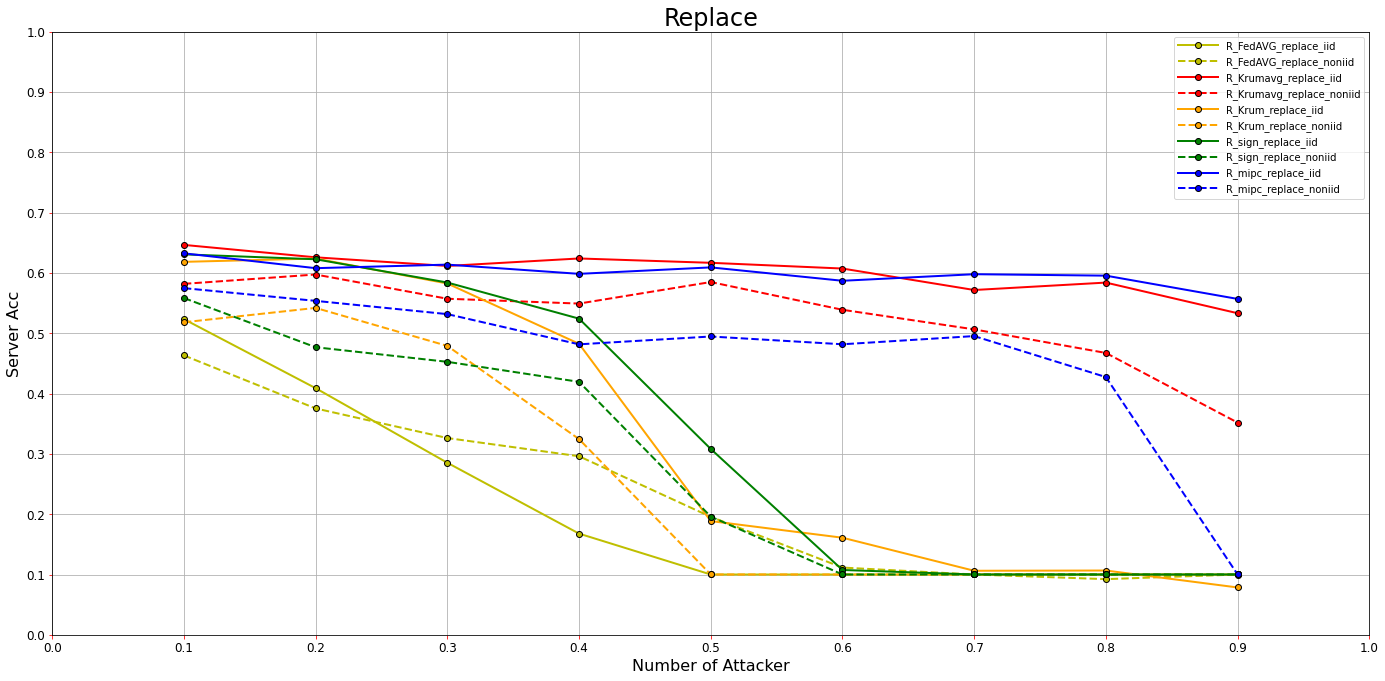

In [ ]:
name_group = ['R_FedAVG_replace_iid_', 'R_FedAVG_replace_noniid_',
              'R_Krumavg_replace_iid_', 'R_Krumavg_replace_noniid_',
              'R_Krum_replace_iid_', 'R_Krum_replace_noniid_',
              'R_sign_replace_iid_', 'R_sign_replace_noniid_',
              'R_mipc_replace_iid_', 'R_mipc_replace_noniid_']
group_distr = ['iid','noniid',
                'iid','noniid',
                'iid','noniid',
                'iid','noniid',
                'iid','noniid']

group_value = {}
for i,j in zip(group_distr,name_group):
    print(j)
    all_value = get_group_data(distribution=i,name=j,attack_type='replace') 
    tmp = [i[-1] for i in all_value]
    group_value[j[:-1]] = tmp

print(group_value)
plot_group_score(group_value,'Replace')

R_FedAVG_replace_iid_
R_FedAVG_replace_noniid_
R_Krumavg_replace_iid_
R_Krumavg_replace_noniid_
R_Krum_replace_iid_
R_Krum_replace_noniid_
R_sign_replace_iid_
R_sign_replace_noniid_
R_mipc_replace_iid_
R_mipc_replace_noniid_
{'R_FedAVG_replace_iid': [0.15625, 0.046875, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'R_FedAVG_replace_noniid': [0.203125, 0.03125, 0.0625, 0.0, 0.046875, 0.328125, 0.8125, 0.109375, 0.0], 'R_Krumavg_replace_iid': [0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.03125, 0.0, 0.015625], 'R_Krumavg_replace_noniid': [0.0, 0.0, 0.015625, 0.015625, 0.046875, 0.03125, 0.0, 0.0, 0.0], 'R_Krum_replace_iid': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'R_Krum_replace_noniid': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'R_sign_replace_iid': [0.0, 0.0, 0.0, 0.0, 0.078125, 0.0, 0.0, 0.0, 0.0], 'R_sign_replace_noniid': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'R_mipc_replace_iid': [0.0, 0.0, 0.046875, 0.015625, 0.046875, 0.015625, 0.03125, 0.03125, 0.0], 'R_mipc_replace_noniid': [

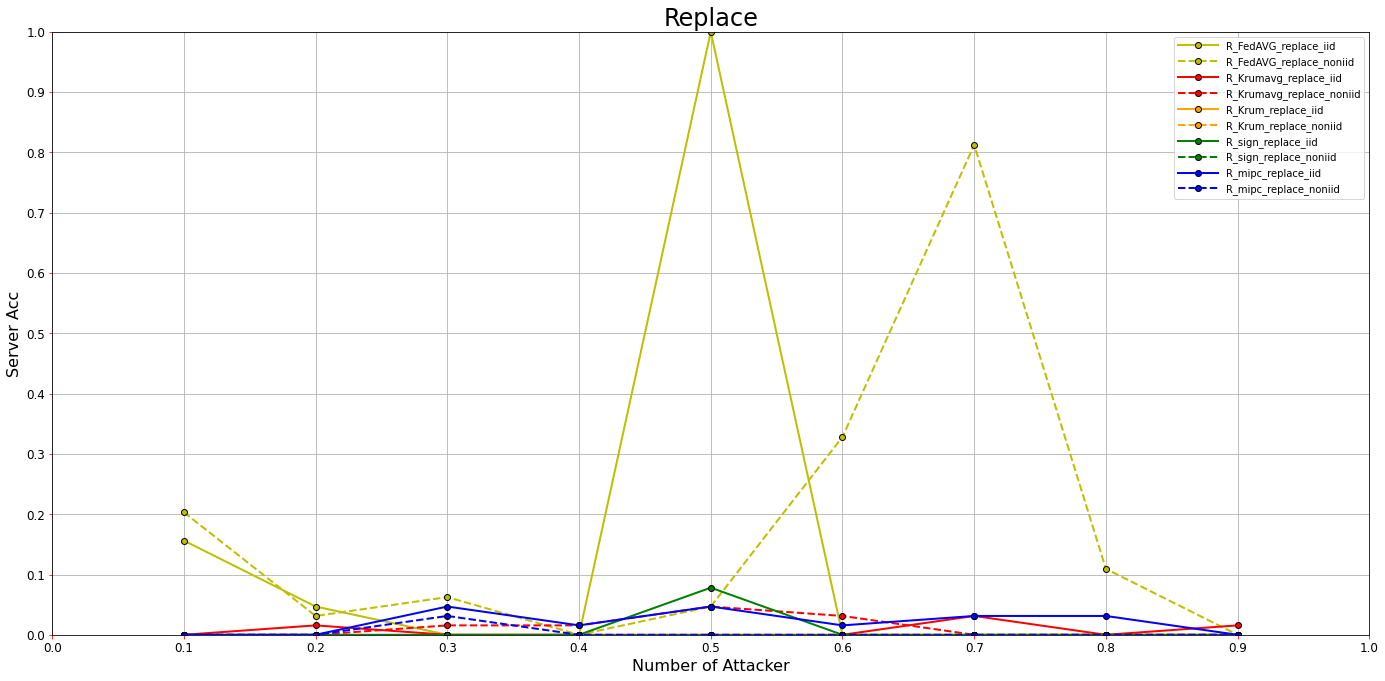

In [ ]:
name_group = ['R_FedAVG_replace_iid_', 'R_FedAVG_replace_noniid_',
              'R_Krumavg_replace_iid_', 'R_Krumavg_replace_noniid_',
              'R_Krum_replace_iid_', 'R_Krum_replace_noniid_',
              'R_sign_replace_iid_', 'R_sign_replace_noniid_',
              'R_mipc_replace_iid_', 'R_mipc_replace_noniid_']
group_distr = ['iid','noniid',
                'iid','noniid',
                'iid','noniid',
                'iid','noniid',
                'iid','noniid']

group_value = {}
for i,j in zip(group_distr,name_group):
    print(j)
    all_value = get_group_data(distribution=i,name=j,attack_type='replace',key='Attack_Acc') 
    tmp = [i[-1] for i in all_value]
    group_value[j[:-1]] = tmp

print(group_value)
plot_group_score(group_value,'Replace')

R_FedAVG_pixel_iid_
R_FedAVG_pixel_noniid_
R_Krumavg_pixel_iid_
R_Krumavg_pixel_noniid_
R_Krum_pixel_iid_
R_Krum_pixel_noniid_
R_sign_pixel_iid_
R_sign_pixel_noniid_
R_mipc_pixel_iid_
R_mipc_pixel_noniid_
{'R_FedAVG_pixel_iid': [0.33070001006126404, 0.545799970626831, 0.9541000127792358, 0.9139999747276306, 0.9940000176429749, 1.0, 1.0, 1.0, 1.0], 'R_FedAVG_pixel_noniid': [0.28450000286102295, 0.7228000164031982, 0.8607000112533569, 0.9631999731063843, 0.9480999708175659, 0.9988999962806702, 0.9987999796867371, 1.0, 1.0], 'R_Krumavg_pixel_iid': [0.10010000318288803, 0.0940999984741211, 0.10010000318288803, 0.11169999837875366, 1.0, 1.0, 1.0, 1.0, 1.0], 'R_Krumavg_pixel_noniid': [0.16439999639987946, 0.8715999722480774, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'R_Krum_pixel_iid': [0.1720000058412552, 0.34779998660087585, 0.574999988079071, 0.9998000264167786, 1.0, 1.0, 1.0, 1.0, 1.0], 'R_Krum_pixel_noniid': [0.13210000097751617, 0.4027000069618225, 0.9886999726295471, 1.0, 1.0, 1.0, 1.0, 1.0

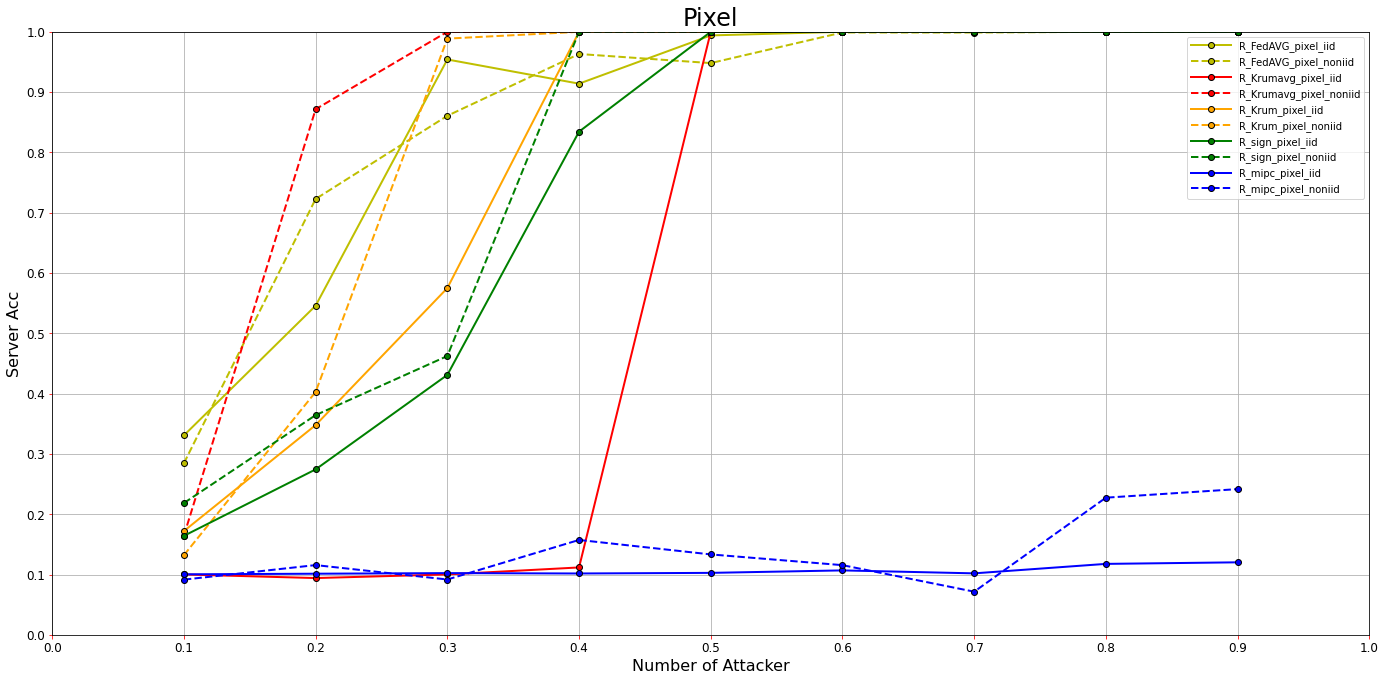

In [ ]:
name_group = ['R_FedAVG_pixel_iid_', 'R_FedAVG_pixel_noniid_',
              'R_Krumavg_pixel_iid_', 'R_Krumavg_pixel_noniid_',
              'R_Krum_pixel_iid_', 'R_Krum_pixel_noniid_',
              'R_sign_pixel_iid_', 'R_sign_pixel_noniid_',
              'R_mipc_pixel_iid_', 'R_mipc_pixel_noniid_']
group_distr = ['iid','noniid',
                'iid','noniid',
                'iid','noniid',
                'iid','noniid',
                'iid','noniid']

group_value = {}
for i,j in zip(group_distr,name_group):
    print(j)
    all_value = get_group_data(distribution=i,name=j,attack_type='pixel',key='Attack_Acc') 
    tmp = [i[-1] for i in all_value]
    group_value[j[:-1]] = tmp

print(group_value)
plot_group_score(group_value,'Pixel')